In [ ]:
import requests
import os
from dotenv import load_dotenv

load_dotenv()  # Carga las variables del archivo .env

client_id = os.getenv("SPOTIFY_CLIENT_ID")
client_secret = os.getenv("SPOTIFY_CLIENT_SECRET")


#URL para obtencion de tokens
url = "https://accounts.spotify.com/api/token"
#Headers necesarios para la request
headers = {
    "Content-Type": "application/x-www-form-urlencoded"
}
#Datos a enviar en la request, aqui van las credenciales
data = {
    "grant_type": "client_credentials",
    "client_id": client_id,
    "client_secret": client_secret
}

#Hacemos la request
response = requests.post(url, headers=headers, data=data)

#Guardamos el token
access_token = response.json().get("access_token")

#Mostramos el resultado
print(access_token)

In [4]:
import requests
import time
import csv
import os


def get_artist_info_incremental(artist_names, access_token, output_file="generos_artistas.csv"):
    base_url = "https://api.spotify.com/v1"
    headers = {
        "Authorization": f"Bearer {access_token}"
    }


    # Crear archivo si no existe
    if not os.path.exists(output_file):
        with open(output_file, mode='w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(["Original Name", "Spotify Name", "Spotify ID", "Genres"])


    # Leer artistas ya procesados
    procesados = set()
    with open(output_file, mode='r', encoding='utf-8') as f:
        next(f)  # saltar cabecera
        for linea in f:
            partes = linea.strip().split(",")
            if partes:
                procesados.add(partes[0].lower())


    for name in artist_names:
        if name.lower() in procesados:
            print(f"⏭️ Ya procesado: {name}")
            continue


        try:
            # Buscar artista
            search_url = f"{base_url}/search"
            params = {"q": name, "type": "artist", "limit": 1}
            response = requests.get(search_url, headers=headers, params=params)
            data = response.json()


            if response.status_code == 200 and data['artists']['items']:
                artist = data['artists']['items'][0]
                artist_id = artist['id']
                spotify_name = artist['name']


                # Obtener géneros
                artist_url = f"{base_url}/artists/{artist_id}"
                artist_response = requests.get(artist_url, headers=headers)
                artist_data = artist_response.json()


                genres = artist_data.get('genres', [])
            else:
                artist_id = None
                spotify_name = None
                genres = []


            # Guardar resultado en archivo CSV
            with open(output_file, mode='a', newline='', encoding='utf-8') as f:
                writer = csv.writer(f)
                writer.writerow([name, spotify_name, artist_id, "; ".join(genres)])


            print(f"✅ Procesado: {name}")
       
        except Exception as e:
            print(f"⚠️ Error con {name}: {e}")


        time.sleep(0.3)  # espera entre llamadas


# --- USO ---
artist_names = [ "Adele", "Aerosmith", "Age of Chance", "Aitana", "Al Green", "Al Jarreau", "Al Stewart", "Alan Parsons", "Alan Walker",
    "Alanis Morissette", "Alaska", "Alejandro Fernández", "Alejandro Sanz", "Alesha Dixon", "Alex Ubago", "Alice Cooper", "Alice In Chains",
    "Alicia Keys", "All Saints", "Alphaville", "Amaia", "Amaia Montero", "Amaral", "America", "Amistades peligrosas", "Amparanoia",
    "Amy MacDonald", "Amy Winehouse", "Ana Belén", "Ana Guerra", "Ana Mena", "Ana Torroja", "Anastacia", "Andrea Bocelli", "Andrea Corr",
    "Andrés Calamaro", "Andy&Lucas", "Anitta", "Annie Lennox", "Antonio Carlos Jobim", "Antonio Flores", "Antonio Orozco", "Antonio Vega",
    "Anuel AA", "Aqua", "Arcade Fire", "Arctic Monkeys", "Aretha Franklin", "Ariana Grande", "Ariel Rot", "Art Garfunkel", "Ashlee Simpson",
    "Avicii", "Avril Lavigne", "B.B. King", "Backstreet Boys", "Bad Bunny", "Bad Religion", "Bananarama", "Bangles", "Barbra Streisand",
    "Barricada", "Barry White", "Beastie Boys", "Beatriz Luengo", "Bebe", "Bebe Rexha", "Bebo Valdés", "Beck", "Bee Gees", "Belén Arjona",
    "Belinda Carlisle", "Ben Harper", "Benny Goodman", "Beret", "Beth", "Beyoncé", "Billie Eilish", "Billie Holiday", "Billy Idol", "Billy Joel",
    "Bing Crosby", "Bizarrap", "Björk", "Black", "Black Eyed Peas", "Black Sabbath", "Blink-182", "Blondie", "Blur", "Bob Dylan", "Bob Marley",
    "Bobby McFerrin", "Bon Iver", "Bon Jovi", "Boney M.", "Bonnie Tyler", "Boy George", "Boyzone", "Brandi Carlile", "Brian Eno", "Brian May",
    "Britney Spears", "Bruce Springsteen", "Bruno Mars", "Bryan Adams", "Bryan Ferry", "Bryn Christopher", "Buffalo Springfield", "Buika",
    "Burning", "C. Tangana", "Caetano Veloso", "Café Quijano", "Café Tacuba", "Calvin Harris", "Camila", "Camila Cabello", "Camilo Sesto",
    "Cardi B", "Carla Bruni", "Carlinhos Brown", "Carlos Baute", "Carlos Cano", "Carlos Jean", "Carlos Núñez", "Carlos Vives", "Carpenters",
    "Cat Stevens", "Celia Cruz", "Celine Dion", "Celtas Cortos", "Cepeda", "Chambao", "Chanel", "Charles Aznavour", "Charlie Puth", "Chavela Vargas",
    "Chayanne", "Chema Vargas", "Chenoa", "Cher", "Chicago", "Chris Brown", "Chris Isaak", "Chris Martin", "Chris Rea", "Christina Aguilera",
    "Christina Rosenvinge", "Christopher Cross", "Chuck Berry", "Coldplay", "Cómplices", "Coque Malla", "Corinne Bailey Rae", "Coti",
    "Counting Crows", "Courtney Love", "Coyote Dax", "Craig David", "Cream", "Creed", "Creedence Clearwater Revival", "Crowded House",
    "Culture Club", "Cyndi Lauper", "Daddy Yankee", "Dani Martín", "Danza invisible", "Darkness", "Dave Grohl", "David Bisbal", "David Bowie",
    "David Bustamante", "David Civera", "David DeMaria", "David Gilmour", "David Guetta", "Deacon Blue", "Decai", "Deep Purple", "Def Con Dos",
    "Def Leppard", "Deftones", "Demi Lovato", "Depeche Mode", "Despistaos", "Destiny's Child", "Diana Krall", "Diana Navarro", "Diana Ross",
    "Dido", "Diego Torres", "Diego Vasallo", "Diplo", "Dire Straits", "DJ Khaled", "Dolly Parton", "Dolores O'Riordan", "Donna Summer",
    "Donovan", "Dover", "Dr. Dre", "Drake", "Dua Lipa", "Duffy", "Dulce Pontes", "Duncan Dhu", "Dúo Dinámico", "Duran Duran", "Dvicio", "Eagles", "Ed Sheeran",
    "Eddie Money", "Eddy Grant", "Edurne", "Efecto mariposa", "El Arrebato", "El Barrio", "El canto del loco", "El Drogas", "El sueño de Morfeo",
    "El último de la fila", "Ella baila sola", "Ella Fitzgerald", "Ellie Goulding", "ELO", "Elton John", "Elvis Costello", "Elvis Presley",
    "Enanitos verdes", "Enigma", "Enrique Bunbury", "Enrique Iglesias", "Enya", "Erasure", "Eric Clapton", "Eros Ramazzotti", "Erreway", "Estopa", "Eternal",
    "Europe", "Eurythmics", "Evanescence", "Extremoduro", "Faith Hill", "Faithless", "Fangoria", "Fats Domino", "Fine Young Cannibals", "Fito Páez", "Fito y Fitipaldis",
    "Fleetwood Mac", "Flo Rida", "Foo Fighters", "Fran Perea", "Franco Battiato", "Frank Ocean", "Frank Sinatra", "Frank Zappa", "Franz Ferdinand", "Freddie Mercury",
    "Fugees", "Gabinete Caligari", "Garbage", "Gemeliers", "Genesis", "George Benson", "George Harrison", "George Michael", "Geri Halliwell",
    "Gilberto Gil", "Gisela", "Gloria Estefan", "Gloria Gaynor", "Gloria Trevi", "Gorillaz", "Grace Jones", "Green Day", "Guaraná",
    "Guns N' Roses", "Gwen Stefani", "Iggy Azalea", "Iggy Pop", "Il Divo", "Imagine Dragons", "Incubus", "India Martínez", "Inxs",
    "Irene Cara", "Iron Maiden", "Ismael Serrano", "Israel Kamakawiwo'ole", "Iván Ferreiro", "J Balvin", "Jaguares", "Jaime Urrutia",
    "James Blunt", "James Brown", "James Morrison", "James Taylor", "Jamiroquai", "Janet Jackson", "Janis Joplin", "Jarabe de palo",
    "Jason Derulo", "Javier Krahe", "Jay-Z", "Jean-Michel Jarre", "Jennifer Lopez", "Jennifer Paige", "Jennifer Rush", "Jerry Lee Lewis",
    "Jessica Simpson", "Jethro Tull", "Jewel", "Jim Morrison", "Jimi Hendrix", "Jimmy Page", "Joan Baez", "Joan Manuel Serrat", "João Gilberto",
    "Joaquín Sabina", "Joe Cocker", "John Cale", "John Fogerty", "John Lee Hooker", "John Lennon", "John Mayer",
    "John Newman", "Johnny Cash", "Johnny Hallyday", "Jon Secada", "Jonas Brothers", "Jorge Drexler", "José Feliciano",
    "José José", "Juan Luis Guerra", "Juan Magán", "Juan Perro", "Juanes", "Judas Priest", "Juice WRLD",
    "Julieta Venegas", "Julio Iglesias", "Justin Bieber", "Justin Timberlake", "Kaiser Chiefs", "Kaka de Luxe",
    "Kansas", "Kanye West", "Karol G", "Kasabian", "Kate Ryan", "Katy Perry", "Keane", "Keith Richards",
    "Kelly Clarkson", "Kelly Price", "Kelly Rowland", "Kendrick Lamar", "Kenny G", "Kenny Rogers", "Kesha",
    "Ketama", "Kiko Veneno", "Kim Petras", "Kings of Leon", "Kiss", "Kurt Cobain", "Kylie Minogue",
    "La cabra mecánica", "La Fuga", "La Oreja de Van Gogh", "La Polla Records", "La quinta estación", "La Unión",
    "Lady Gaga", "Lana Del Rey", "Las Ketchup", "Laura Branigan", "Laura Pausini", "Led Zeppelin", "Leiva",
    "Lenny Kravitz", "Leona Lewis", "Leonard Cohen", "Leonor Watling", "Level 42", "Liam Gallagher", "Liam Payne",
    "Lil Nas X", "Lil Wayne", "Lily Allen", "Limahl", "Linkin Park", "Lionel Richie", "Lisa Stansfield",
    "Little Richard", "Liza Minelli", "Lizzo", "Lola Índigo", "Loquillo", "Loquillo y Trogloditas", "Lori Meyers",
    "Los Fabulosos Cadillacs", "Los Lobos", "Los Nikis", "Los Planetas", "Los Rodríguez", "Los Ronaldos",
    "Los secretos", "Los Suaves", "Los Toreros Muertos", "Lou Bega", "Lou Reed", "Louis Armstrong", "Love of Lesbian",
    "Luar Na Lubre", "Lucie Silvas", "Lucrecia", "Luis Eduardo Aute",  "Luis Fonsi", "Luis Miguel", "Luz", "M-clan", "Mac Miller", "Macaco", "Madcon", "Madness", "Madonna",
    "Mago de Oz", "Maldita Nerea", "Malú", "Maluma", "Maná", "Manic Street Preachers", "Manolo García",
    "Manolo Tena", "Manowar", "Manu Chao", "Manu Tenorio", "Manuel Carrasco", "Manuel Turizo", "Marc Anthony",
    "Marea", "María Becerra", "Mariah Carey", "Marie Fredriksson", "Marilyn Manson", "Mark Knopfler",
    "Mark Ronson", "Marlango", "Maroon 5", "Marta Botía", "Marta Sánchez", "Martin Garrix", "Marvin Gaye",
    "Massive Attack", "Meat Loaf", "Mecano", "Medina Azahara", "Meghan Trainor", "Mel B", "Melendi", "Melocos",
    "Melon Diesel", "Men at Work", "Mercedes Sosa", "Merche", "Metallica", "Miami Sound Machine",
    "Michael Bolton", "Michael Bublé", "Michael Jackson", "Michael Stipe", "Michel Teló", "Mick Jagger",
    "Miguel Bosé", "Miguel Ríos", "Mika", "Mike Oldfield", "Mike Posner", "Mikel Erentxun", "Miles Davis",
    "Miley Cyrus", "Miliki", "Miranda Lambert", "Miranda Warning", "Miss Caffeina", "Missy Elliot", "Mocedades",
    "Modern Talking", "Mojinos Escozíos", "Molotov", "Mónica Naranjo", "Morat", "Morrissey", "Motel", "Mötorhead",
    "Mumford & Sons", "Muse", "My Chemical Romance", "Nach", "Nacha Pop", "Nacho Cano", "Nacho Canut",
    "Nacho Vegas", "Najwa", "Nat King Cole", "Natalia", "Natalia Lafourcade", "Natalia Oreiro", "Natalie Cole",
    "Natalie Imbruglia", "Neil Diamond", "Neil Young", "Nek", "Nelly Furtado", "Nena Daconte",
    "New Kids on the Block", "New Order", "Nick Carter", "Nick Cave", "Nick Cave & The Bad Seeds", "Nick Lowe", "Nicki Minaj", "Nicki Nicole",
    "Nicky Jam", "Nina Hagen", "Niña Pastori", "Nina Simone", "Nino Bravo", "Nirvana", "No Doubt", "Noa",
    "Noel Gallagher", "Norah Jones", "Nuria Fergó", "Oasis", "OBK", "Olivia Newton-John", "Olivia Rodrigo",
    "One Direction", "OneRepublic", "Orishas", "Otis Redding", "Ozuna", "Ozzy Osbourne", "P.J. Harvey",
    "Pablo Alborán", "Pablo López", "Pablo Milanés", "Paco de Lucía", "Panic! at the Disco", "Parachute",
    "Paramore", "Pasión Vega", "Pastora Soler", "Pata Negra", "Patricia Manterola", "Patti Smith",
    "Patxi Andión", "Paul Anka", "Paul McCartney", "Paul Simon", "Paul Weller", "Paulina Rubio",
    "Paulo Londra", "Pearl Jam", "Pedro Guerra", "Pereza", "Pet Shop Boys", "Pete Doherty", "Peter Frampton",
    "Peter Gabriel", "Pharrell Williams", "Phil Collins", "Phil Spector", "Pignoise", "Pink", "Pink Floyd",
    "Pitbull", "Pitingo", "Pixies", "Placebo", "Platero y tú", "Post Malone", "Presuntos implicados", "Prince",
    "Queen", "Queens of the Stone Age", "Quevedo", "Quiet Riot", "Quincy Jones", "Quique González", "R. Kelly",
    "R.E.M.", "Radio Futura", "Radiohead", "Rammstein", "Ramones", "Raphael", "Rauw Alejandro", "Ray Charles",
    "RBD", "Red Hot Chili Peppers", "Revólver", "Ricardo Arjona", "Richard Ashcroft", "Rick Astley",
    "Ricky Martin", "Rihanna", "Ringo Starr", "Rita Ora", "Robbie Williams", "Robert Palmer", "Robert Plant",
    "Robert Ramírez", "Roberta Flack", "Roberto Carlos", "Robyn", "Rocío Dúrcal", "Rod Stewart", "Roger Daltrey", "Roger Taylor", "Roger Waters", "Romeo Santos", "Rosa",
    "Rosalía", "Rosana", "Rosario", "Rosendo", "Roxette", "Roxy Music", "Roy Orbison", "Rozalén",
    "Rubén Blades", "Russian Red", "Ryan Adams", "Sade", "Sam Cooke", "Sam Ryder", "Sam Smith", "Santana",
    "Santiago Auserón", "Sara Baras", "Sarah Brightman", "Sarah McLachlan", "Scarlett Johansson", "Scorpions",
    "Scream", "Seal", "Sebastián Yatra", "Second", "Seguridad Social", "Selena", "Selena Gómez", "Sergio Dalma",
    "Sex Pistols", "Shaila Durcal", "Shakira", "Shania Twain", "Sharleen Spiteri", "Shawn Mendes", "Sheryl Crow",
    "Sia", "Sidecars", "Sidonie", "Silvio Rodríguez", "Simon & Garfunkel", "Simple Minds", "Simple Plan",
    "Simply Red", "Sinéad O'Connor", "Siniestro Total", "Ska-p", "Slash", "Sleepy Labeef", "Snoop Dogg",
    "Snow Patrol", "Soda Stereo", "Sole Giménez", "Soziedad Alkoholika", "Spandau Ballet", "Spice Girls",
    "Spin Doctors", "Status Quo", "Stereolab", "Stereophonics", "Steve Mac", "Steve Miller Band",
    "Steve Winwood", "Stevie Wonder", "Sting", "Suede", "Sugababes", "Sugar Ray", "Supergrass", "Supertramp",
    "Suzanne Vega", "Syd Barrett", "Take That", "Talking Heads", "Tam Tam Go", "Tamara", "Tanita Tikaram",
    "Tarque", "Taxi", "Taylor Swift", "Tears For Fears", "Tequila", "Terence Trent D'Arby", "Texas", "Thalía",
    "The Animals", "The Beach Boys", "The Beatles", "The Blues Brothers", "The Cabriolets", "The Cardigans",
    "The Cars", "The Chemical Brothers", "The Clash", "The Communards", "The Corrs", "The Cranberries", "The Cult",
    "The Cure", "The Darkness", "The Doors", "The Housemartins", "The Human League", "The Jackson 5",
    "The Jacksons", "The Killers", "The Kinks", "The Lemonheads", "The Mamas & the Papas", "The Monkees",
    "The Moody Blues", "The Offspring", "The Police", "The Pretenders", "The Pussycat Dolls",
    "The Rolling Stones", "The Smiths", "The Stone Roses", "The Strokes", "The Supremes",
    "The Velvet Underground", "The Verve", "The Wallflowers", "The Waterboys", "The Weeknd", "The Who",
    "The Yardbirds", "Them", "Thom Yorke", "Timbaland", "Tina Turner", "Tino Casal", "Tiziano Ferro",
    "Tokio Hotel", "Tom Chaplin", "Tom Jones", "Tom Petty", "Tom Waits", "Toni Braxton", "Tony Bennett",
    "Toto", "Tove Lo", "Tracy Chapman", "Travis", "Travis Scott", "Twenty One Pilots", "U2", "UB40",
    "Ultravox", "Underworld", "Usher", "Van Halen", "Van Morrison", "Vanesa Martín", "Vanessa Carlton",
    "Vanessa Paradis", "Vanessa Williams", "Vangelis", "Vargas Blues Band", "Vega", "Vengaboys", "Verónica",
    "Vetusta Morla", "Víctor Manuel", "Violadores del Verso", "Vonda Shepard", "Westlife", "Wham!",
    "Whitney Houston", "Wilco", "Will Smith", "Willy DeVille", "Wilson Pickett", "Wiz Khalifa",
    "Yael Naim", "Zayn Malik", "Zucchero", "ZZ Top"
   
   
]


# Ejecutar
get_artist_info_incremental(artist_names, access_token)

✅ Procesado: Adele
✅ Procesado: Aerosmith
✅ Procesado: Age of Chance
✅ Procesado: Aitana
✅ Procesado: Al Green
✅ Procesado: Al Jarreau
✅ Procesado: Al Stewart
✅ Procesado: Alan Parsons
✅ Procesado: Alan Walker
✅ Procesado: Alanis Morissette
✅ Procesado: Alaska
✅ Procesado: Alejandro Fernández
✅ Procesado: Alejandro Sanz
✅ Procesado: Alesha Dixon
✅ Procesado: Alex Ubago
✅ Procesado: Alice Cooper
✅ Procesado: Alice In Chains
✅ Procesado: Alicia Keys
✅ Procesado: All Saints
✅ Procesado: Alphaville
✅ Procesado: Amaia
✅ Procesado: Amaia Montero
✅ Procesado: Amaral
✅ Procesado: America
✅ Procesado: Amistades peligrosas
✅ Procesado: Amparanoia
✅ Procesado: Amy MacDonald
✅ Procesado: Amy Winehouse
✅ Procesado: Ana Belén
✅ Procesado: Ana Guerra
✅ Procesado: Ana Mena
✅ Procesado: Ana Torroja
✅ Procesado: Anastacia
✅ Procesado: Andrea Bocelli
✅ Procesado: Andrea Corr
✅ Procesado: Andrés Calamaro
✅ Procesado: Andy&Lucas
✅ Procesado: Anitta
✅ Procesado: Annie Lennox
✅ Procesado: Antonio Carlos Jobi

In [8]:
import json
import csv
import requests


# Leer los IDs de los artistas desde el archivo CSV
csv_input_path = "generos_artistas.csv"
artist_ids = []

with open(csv_input_path, mode="r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    for row in reader:
        artist_id = row.get("Spotify ID")  # Usamos el nombre correcto de la columna
        if artist_id:
            artist_ids.append(artist_id)

artists_attributes_list = []

# Iteramos sobre cada id para hacer la consulta y extraer la información
for artist_id in artist_ids:
    url_artist = f"https://api.spotify.com/v1/artists/{artist_id}"
    headers_artist = {
        "Authorization": f"Bearer {access_token}"
    }
    response_artist = requests.get(url_artist, headers=headers_artist)
    
    if response_artist.status_code != 200:
        print(f"Error al obtener datos para el artista con ID: {artist_id}")
        continue
    
    artist_data = response_artist.json()
    
    images = artist_data.get("images", [])
    genres = artist_data.get("genres", [])
    
    artist_attributes = {
        "id": artist_data.get("id"),
        "name": artist_data.get("name"),
        "type": artist_data.get("type"),
        "uri": artist_data.get("uri"),
        "href": artist_data.get("href"),
        "popularity": artist_data.get("popularity"),
        "genres": genres,
        "primary_genre": genres[0] if genres else None,
        "external_url": artist_data.get("external_urls", {}).get("spotify"),
        "followers_total": artist_data.get("followers", {}).get("total"),
        "followers_href": artist_data.get("followers", {}).get("href"),
        "number_of_images": len(images),
        "first_image_url": images[0].get("url") if images else None,
        "last_image_url": images[-1].get("url") if images else None,
        "images_info": [
            {"url": img.get("url"), "height": img.get("height"), "width": img.get("width")}
            for img in images
        ]
    }
    
    artists_attributes_list.append(artist_attributes)

# Guardar los datos en un archivo CSV
csv_filename = "artists_data.csv"
fieldnames = [
    "id", "name", "type", "uri", "href", "popularity",
    "genres", "primary_genre", "external_url", "followers_total",
    "followers_href", "number_of_images", "first_image_url", "last_image_url",
    "images_info"
]

with open(csv_filename, mode="w", newline="", encoding="utf-8") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for artist in artists_attributes_list:
        artist["genres"] = ", ".join(artist["genres"])
        artist["images_info"] = "; ".join([
            f"url: {img['url']}, height: {img['height']}, width: {img['width']}"
            for img in artist["images_info"]
        ])
        writer.writerow(artist)

print(f"Datos almacenados en {csv_filename}")


Datos almacenados en artists_data.csv


In [ ]:
#Biblioteca para formatear json, sólo necesaria por claridad
import json
import csv
import requests

# Lista de 20 IDs de artistas (con comentarios para identificar a cada uno)
artist_ids = [


    
]

artists_attributes_list = []

# Iteramos sobre cada id para hacer la consulta y extraer la información
for artist_id in artist_ids:
    url_artist = f"https://api.spotify.com/v1/artists/{artist_id}"
    headers_artist = {
    "Authorization": f"Bearer {access_token}"
}
    response_artist = requests.get(url_artist, headers=headers_artist)
    headers_artist = {
    "Authorization": f"Bearer {access_token}"
}
    
    if response_artist.status_code != 200:
        print(f"Error al obtener datos para el artista con ID: {artist_id}")
        continue  # Si hay error, pasa al siguiente artista
    
    artist_data = response_artist.json()
    
    # Obtenemos listas de imágenes y géneros (si existen)
    images = artist_data.get("images", [])
    genres = artist_data.get("genres", [])
    
    # Extraemos 15 atributos (algunos directos, otros derivados)
    artist_attributes = {
        "id": artist_data.get("id"),                                            # 1. Identificador del artista
        "name": artist_data.get("name"),                                        # 2. Nombre del artista
        "type": artist_data.get("type"),                                        # 3. Tipo (ej.: artist)
        "uri": artist_data.get("uri"),                                          # 4. URI de Spotify
        "href": artist_data.get("href"),                                        # 5. Enlace a la API
        "popularity": artist_data.get("popularity"),                            # 6. Popularidad
        "genres": genres,                                                       # 7. Lista de géneros
        "primary_genre": genres[0] if genres else None,                         # 8. Primer género (si existe)
        "external_url": artist_data.get("external_urls", {}).get("spotify"),      # 9. URL externa en Spotify
        "followers_total": artist_data.get("followers", {}).get("total"),         # 10. Total de seguidores
        "followers_href": artist_data.get("followers", {}).get("href"),           # 11. Href de seguidores (usualmente None)
        "number_of_images": len(images),                                        # 12. Cantidad de imágenes disponibles
        "first_image_url": images[0].get("url") if images else None,              # 13. URL de la primera imagen
        "last_image_url": images[-1].get("url") if images else None,              # 14. URL de la última imagen
        "images_info": [                                                        # 15. Detalles de cada imagen (url, height y width)
            {"url": img.get("url"), "height": img.get("height"), "width": img.get("width")}
            for img in images
        ]
    }
    
    artists_attributes_list.append(artist_attributes)

# Mostramos la lista de diccionarios en formato JSON


# Nombre del archivo CSV donde se almacenarán los datos
csv_filename = "artists_data.csv"

# Definimos los nombres de las columnas que estarán en el archivo CSV
fieldnames = [
    "id", "name", "type", "uri", "href", "popularity",
    "genres", "primary_genre", "external_url", "followers_total",
    "followers_href", "number_of_images", "first_image_url", "last_image_url",
    "images_info"
]

# Abrimos el archivo CSV en modo escritura
with open(csv_filename, mode="w", newline="", encoding="utf-8") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    # Escribimos la fila de encabezado
    writer.writeheader()
    
    # Escribimos cada fila con los datos de los artistas
    for artist in artists_attributes_list:
        # Convertimos la lista de géneros en una cadena separada por comas
        artist["genres"] = ", ".join(artist["genres"])
        
        # Convertimos la lista de imágenes en una cadena con detalles separados por ";"
        artist["images_info"] = "; ".join([
            f"url: {img['url']}, height: {img['height']}, width: {img['width']}" 
            for img in artist["images_info"]
        ])
        
        # Escribimos la fila de datos del artista
        writer.writerow(artist)

print(f"Datos almacenados en {csv_filename}")



Error al obtener datos para el artista con ID: 5K4W6rqBFWDnAN6FQUkS6x6qqNVTkY8uBg9cP3Jd7DAH
Error al obtener datos para el artista con ID: 3qsKSpcV3ncke3vwHya3n2
Datos almacenados en artists_data.csv


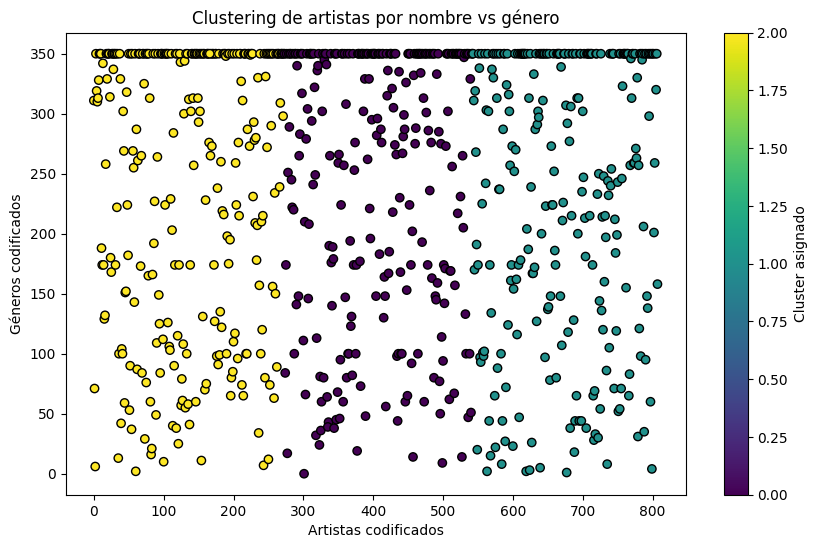

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv("generos_artistas.csv")

# Asegurar que las columnas necesarias existen
assert "Original Name" in df.columns and "Genres" in df.columns, "Columnas necesarias no encontradas."

# Convertir nombres de artistas (original_name) a números con LabelEncoder
name_encoder = LabelEncoder()
X = name_encoder.fit_transform(df["Original Name"])
X = X.reshape(-1, 1)  # KMeans espera una matriz 2D

# Codificar los géneros como etiquetas numéricas (para y)
genre_encoder = LabelEncoder()
y = genre_encoder.fit_transform(df["Genres"])

# Entrenar el modelo KMeans (puedes cambiar el número de clusters si lo deseas)
kmeans = KMeans(n_clusters=3, random_state=20)
kmeans.fit(X)

# Obtener etiquetas del modelo
labels = kmeans.labels_

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=labels, cmap='viridis', edgecolor='k')
plt.title("Clustering de artistas por nombre vs género")
plt.xlabel("Artistas codificados")
plt.ylabel("Géneros codificados")
plt.colorbar(label='Cluster asignado')
plt.show()

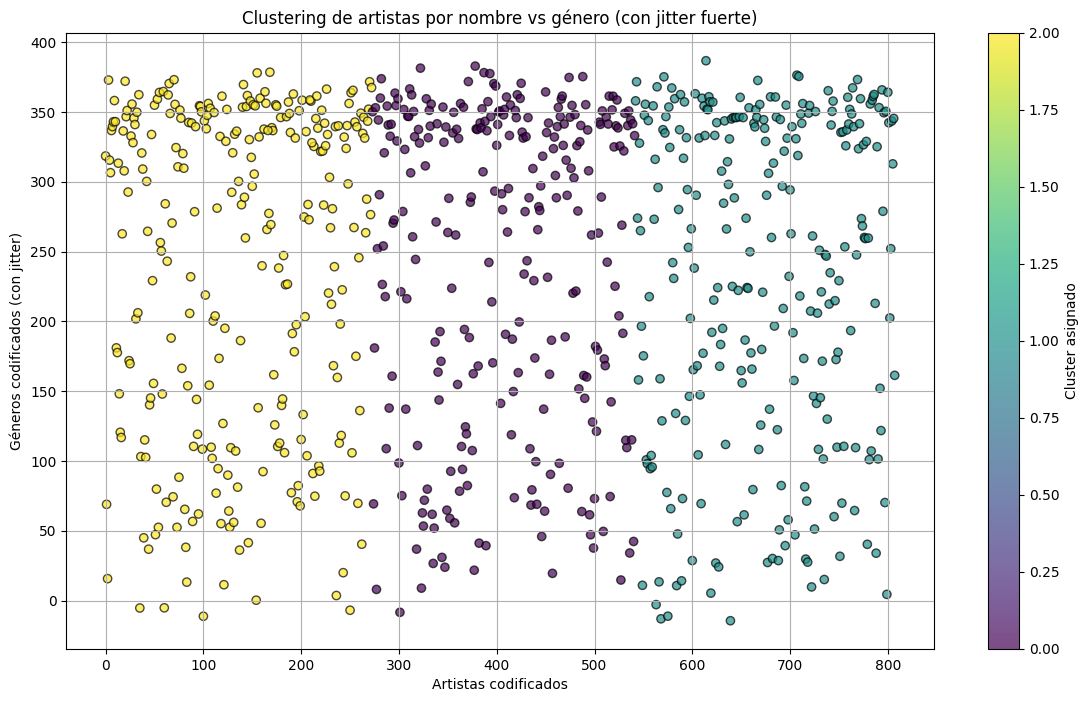

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Leer el CSV
df = pd.read_csv("generos_artistas.csv")

# Codificar nombres y géneros
name_encoder = LabelEncoder()
genre_encoder = LabelEncoder()
X = name_encoder.fit_transform(df["Original Name"])
y = genre_encoder.fit_transform(df["Genres"])

# Agregar jitter más fuerte (esto sí funcionará)
np.random.seed(42)
y_jittered = y + np.random.normal(0, 15, size=y.shape)  # Antes era ~2, ahora más visible

# Reentrenar modelo KMeans con solo nombres
X_2D = X.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=20)
labels = kmeans.fit_predict(X_2D)

# Graficar con jitter fuerte
plt.figure(figsize=(14, 8))
plt.scatter(X, y_jittered, c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("Clustering de artistas por nombre vs género (con jitter fuerte)")
plt.xlabel("Artistas codificados")
plt.ylabel("Géneros codificados (con jitter)")
plt.colorbar(label='Cluster asignado')
plt.grid(True)
plt.show()


In [37]:
import pandas as pd

# Leer CSV
df = pd.read_csv("generos_artistas.csv")

# Mostrar total de filas
print("🎯 Total de registros:", len(df))

# Limpiar la columna Genres: eliminar espacios y convertir a minúsculas (opcional)
df["Genres"] = df["Genres"].astype(str).str.strip()

# Mostrar cuántos están vacíos o con "nan"
missing = df["Genres"].isna().sum() + df["Genres"].eq("nan").sum() + df["Genres"].eq("").sum()
print(f"⚠️ Registros sin género: {missing}")

# Mostrar géneros más frecuentes
genre_counts = df["Genres"].value_counts()
print("\n🎧 Géneros más comunes:")
print(genre_counts.head(10))

# Sumar total de géneros contados
print("\n📊 Total de registros contados (value_counts):", genre_counts.sum())


🎯 Total de registros: 808
⚠️ Registros sin género: 286

🎧 Géneros más comunes:
Genres
nan                       286
latin pop                  19
flamenco; flamenco pop     18
singer-songwriter          10
soft rock                  10
classic rock                7
christmas                   7
pop                         7
indie                       7
britpop                     6
Name: count, dtype: int64

📊 Total de registros contados (value_counts): 808


In [1]:
import csv

# Nombre del archivo original y del nuevo
archivo_entrada = 'generos_artistas.csv'
archivo_salida = 'generos_artistas_con guion.csv'

# Abrir archivo de entrada y de salida
with open(archivo_entrada, 'r', newline='', encoding='utf-8') as entrada_csv, \
     open(archivo_salida, 'w', newline='', encoding='utf-8') as salida_csv:

    lector = csv.reader(entrada_csv)
    escritor = csv.writer(salida_csv)

    for fila in lector:
        nueva_fila = [celda.replace(' ', '-') for celda in fila]
        escritor.writerow(nueva_fila)

print("Archivo modificado guardado como:", archivo_salida)

Archivo modificado guardado como: generos_artistas_con guion.csv


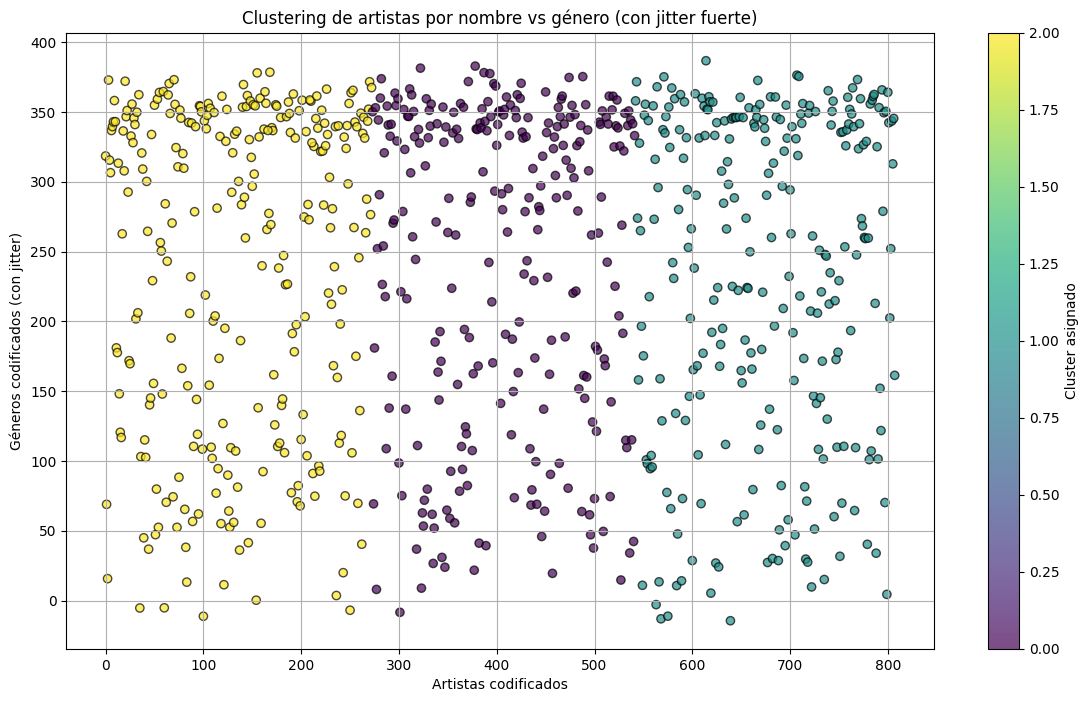

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Leer el CSV
df = pd.read_csv("generos_artistas_con guion.csv")

# Codificar nombres y géneros
name_encoder = LabelEncoder()
genre_encoder = LabelEncoder()
X = name_encoder.fit_transform(df["Original-Name"])
y = genre_encoder.fit_transform(df["Genres"])

# Agregar jitter más fuerte (esto sí funcionará)
np.random.seed(42)
y_jittered = y + np.random.normal(0, 15, size=y.shape)  # Antes era ~2, ahora más visible

# Reentrenar modelo KMeans con solo nombres
X_2D = X.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=20)
labels = kmeans.fit_predict(X_2D)

# Graficar con jitter fuerte
plt.figure(figsize=(14, 8))
plt.scatter(X, y_jittered, c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("Clustering de artistas por nombre vs género (con jitter fuerte)")
plt.xlabel("Artistas codificados")
plt.ylabel("Géneros codificados (con jitter)")
plt.colorbar(label='Cluster asignado')
plt.grid(True)
plt.show()

In [4]:
import pandas as pd

# Leer CSV
df = pd.read_csv("generos_artistas_con guion.csv")

# Mostrar total de filas
print("🎯 Total de registros:", len(df))

# Limpiar la columna Genres: eliminar espacios y convertir a minúsculas (opcional)
df["Genres"] = df["Genres"].astype(str).str.strip()

# Mostrar cuántos están vacíos o con "nan"
missing = df["Genres"].isna().sum() + df["Genres"].eq("nan").sum() + df["Genres"].eq("").sum()
print(f"⚠️ Registros sin género: {missing}")

# Mostrar géneros más frecuentes
genre_counts = df["Genres"].value_counts()
print("\n🎧 Géneros más comunes:")
print(genre_counts.head(10))

# Sumar total de géneros contados
print("\n📊 Total de registros contados (value_counts):", genre_counts.sum())

🎯 Total de registros: 808
⚠️ Registros sin género: 286

🎧 Géneros más comunes:
Genres
nan                       286
latin-pop                  19
flamenco;-flamenco-pop     18
singer-songwriter          10
soft-rock                  10
classic-rock                7
christmas                   7
pop                         7
indie                       7
britpop                     6
Name: count, dtype: int64

📊 Total de registros contados (value_counts): 808


c:\Users\pamev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


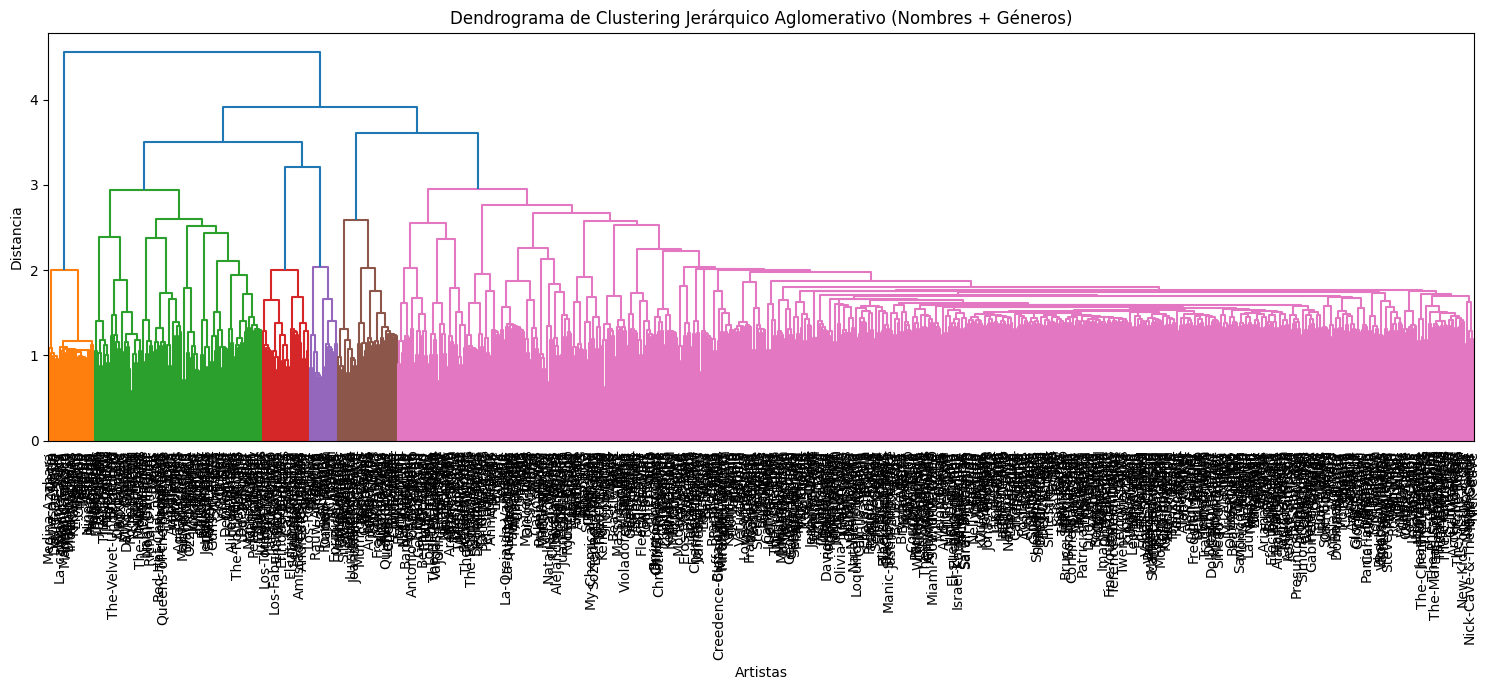

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.pipeline import FeatureUnion
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np

# Cargar el DataFrame desde un archivo
df = pd.read_csv('generos_artistas_con guion.csv')  # reemplaza 'archivo.csv' con tu ruta real

# Reemplazar NaN por cadena vacía
df['Genres'] = df['Genres'].fillna('')
df['Original-Name'] = df['Original-Name'].fillna('')

# (continúa con el resto de tu código)


# Reemplazar NaN por cadena vacía
df['Genres'] = df['Genres'].fillna('')
df['Original-Name'] = df['Original-Name'].fillna('')

# Preparar vectores TF-IDF para nombres y géneros
vectorizer_name = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
vectorizer_genre = TfidfVectorizer(tokenizer=lambda x: x.split(';'))

# Combinar ambos en un solo vector
combined_features = FeatureUnion([
    ('name', vectorizer_name),
    ('genre', vectorizer_genre)
])

X_combined = combined_features.fit_transform(df[['Original-Name', 'Genres']].agg(' '.join, axis=1))
X_combined = normalize(X_combined)

# Aplicar Clustering Jerárquico Aglomerativo
linked = linkage(X_combined.toarray(), method='ward')

# Visualizar dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=df['Original-Name'].values, leaf_rotation=90, leaf_font_size=10, color_threshold=0.7 * max(linked[:, 2]))
plt.title("Dendrograma de Clustering Jerárquico Aglomerativo (Nombres + Géneros)")
plt.xlabel("Artistas")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()


c:\Users\pamev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


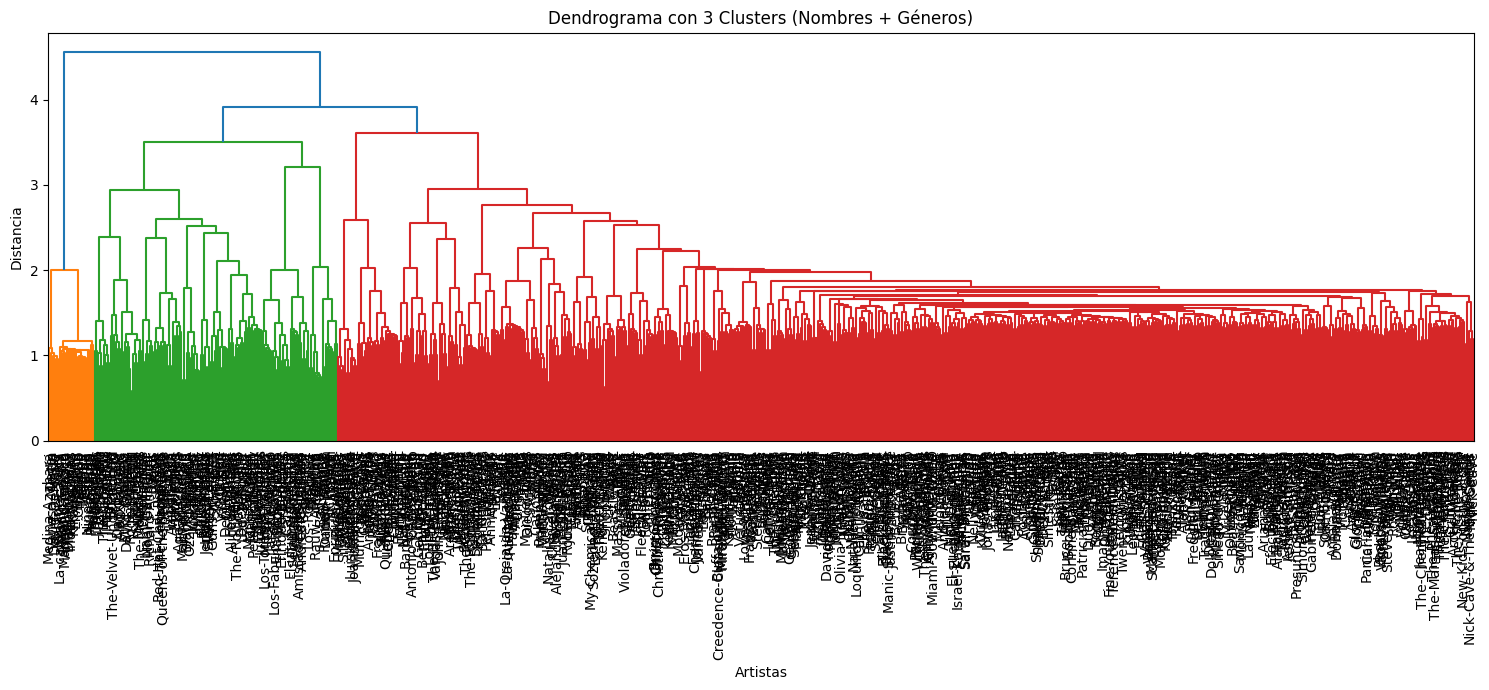

      Original-Name                                         Genres  Cluster
783   Vanesa-Martín                         flamenco-pop;-flamenco        1
41   Antonio-Orozco                         flamenco;-flamenco-pop        1
36       Andy&Lucas                         flamenco;-flamenco-pop        1
557     Pasión-Vega                 flamenco;-flamenco-pop;-bolero        1
530    Niña-Pastori                         flamenco;-flamenco-pop        1
..              ...                                            ...      ...
804       Yael-Naim                                                       3
805      Zayn-Malik                                                       3
806        Zucchero         italo-dance;-italian-singer-songwriter        3
807          ZZ-Top  southern-rock;-classic-rock;-blues-rock;-rock        3
0             Adele                                       soft-pop        3

[808 rows x 3 columns]


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.pipeline import FeatureUnion
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv('generos_artistas_con guion.csv')

# Limpiar datos
df['Genres'] = df['Genres'].fillna('')
df['Original-Name'] = df['Original-Name'].fillna('')

# Vectorización TF-IDF
vectorizer_name = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
vectorizer_genre = TfidfVectorizer(tokenizer=lambda x: x.split(';'))

combined_features = FeatureUnion([
    ('name', vectorizer_name),
    ('genre', vectorizer_genre)
])

X_combined = combined_features.fit_transform(df[['Original-Name', 'Genres']].agg(' '.join, axis=1))
X_combined = normalize(X_combined)

# Clustering jerárquico
linked = linkage(X_combined.toarray(), method='ward')

# Agrupar en 3 clusters
df['Cluster'] = fcluster(linked, 3, criterion='maxclust')

# Calcular el threshold de distancia que produce 3 clusters
last = linked[-3, 2]  # distancia en el tercer último paso
threshold = last + 0.01  # leve aumento para que se vean 3 colores

# Visualizar dendrograma con 3 colores
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=df['Original-Name'].values, leaf_rotation=90, leaf_font_size=10, 
           color_threshold=threshold)
plt.title("Dendrograma con 3 Clusters (Nombres + Géneros)")
plt.xlabel("Artistas")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# Mostrar resultados
print(df[['Original-Name', 'Genres', 'Cluster']].sort_values('Cluster'))


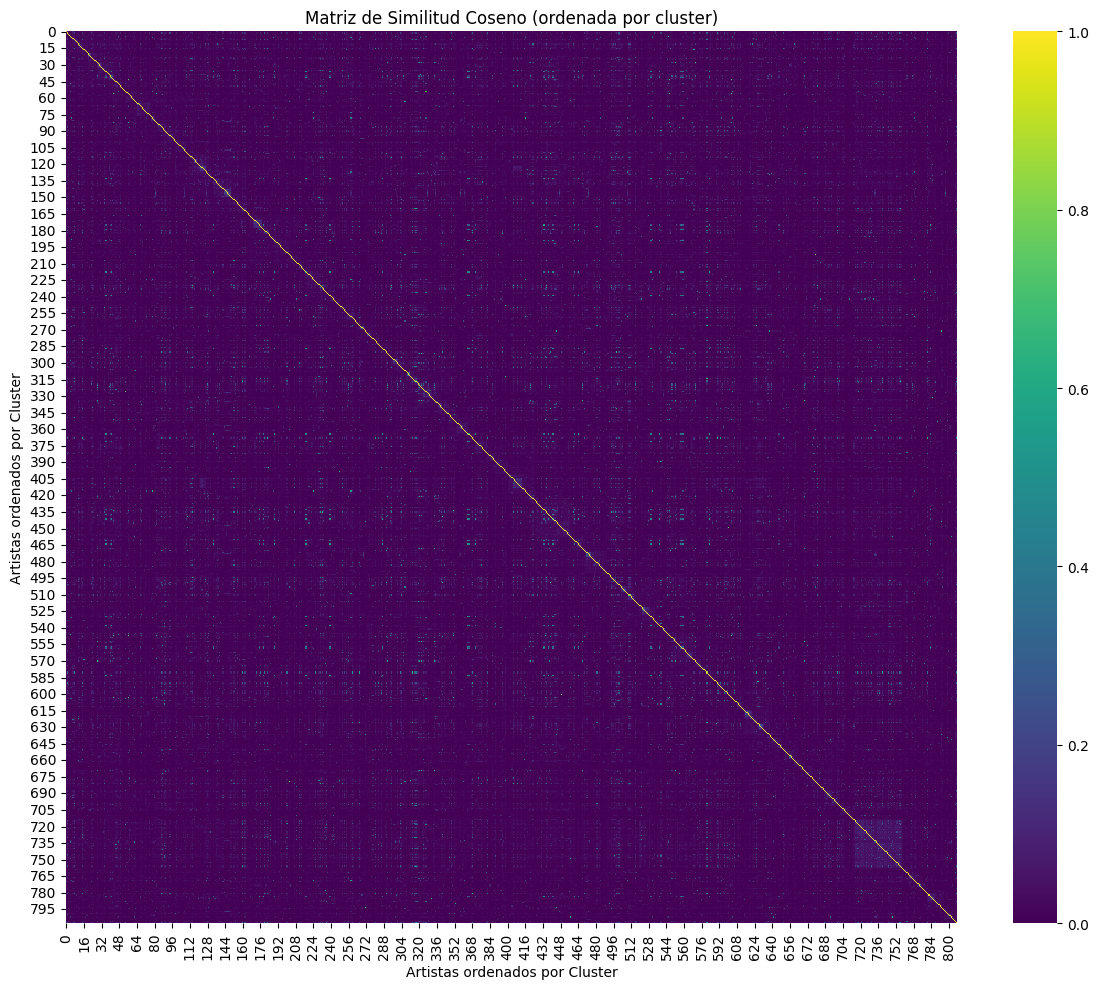

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de similitud coseno
sim_matrix = cosine_similarity(X_combined)

# Ordenar por cluster
df_sorted = df.sort_values('Cluster').reset_index(drop=True)
sim_matrix_sorted = sim_matrix[df_sorted.index][:, df_sorted.index]

# Visualizar como mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(sim_matrix_sorted, cmap='viridis')
plt.title("Matriz de Similitud Coseno (ordenada por cluster)")
plt.xlabel("Artistas ordenados por Cluster")
plt.ylabel("Artistas ordenados por Cluster")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

# Calcular puntaje de silhouette
score = silhouette_score(X_combined, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.009


In [11]:
# Solo con Géneros
X_genres = TfidfVectorizer(tokenizer=lambda x: x.split(';')).fit_transform(df['Genres'])
score_genres = silhouette_score(X_genres, fcluster(linkage(X_genres.toarray(), method='ward'), 3, criterion='maxclust'))
print(f"Silhouette Score (solo Géneros): {score_genres:.3f}")


Silhouette Score (solo Géneros): 0.381


c:\Users\pamev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


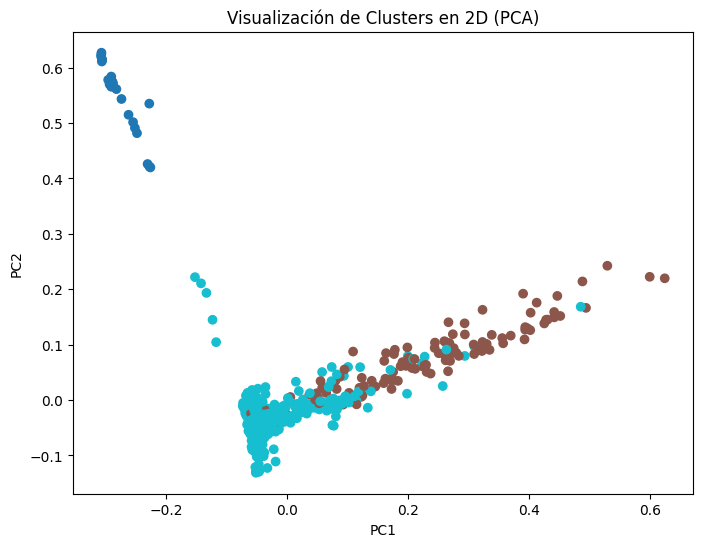

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción a 2D
X_2d = PCA(n_components=2).fit_transform(X_combined.toarray())

# Colorear por cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Cluster'], cmap='tab10')
plt.title("Visualización de Clusters en 2D (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
